# TP2

## Exercise 1

On considère la fonction $J(x,y) = 2x^2 + 3xy + 2y^2$ definie sur $\mathbb{R}^2$. On appelle Q le cadran défini par:

$$
Q = \{ x \le -\frac{1}{2}, y \le -\frac{1}{2} \}
$$

## Analyse théorique

Premièrement, on voudrait résoudre le problème de minimisation de $J$ sans contrainte: 

Coercivité de $J$:

$$
 \frac{3}{2}(x + y)^2 = \frac{3}{2}(x^2 + 2xy + y^2) = \frac{3}{2}(x^2 + y^2)  + 3xy 
$$
Donc
$$
J(x,y) = 2x^2 + 3xy + 2y^2 = \frac{3}{2}(x^2 + y^2)  +3xy + \frac{1}{2}(x^2 + y^2)   = \frac{3}{2}(x + y)^2 +  \frac{1}{2}(x^2 + y^2)
$$

comme $\frac{3}{2}(x + y)^2 \ge 0$

$$
J(x,y) \ge \frac{1}{2}(x^2 + y^2) =  \frac{1}{2}\| x^2 + y^2 \|
$$

Alors $J$ est coércive.

$J$ est continue comme polynomial et $\mathbb{R}^2$ est un fermé de $\mathbb{R}$^2

Comme J est une fonction continue coércive sur un compact, alors J atteint son minimum. Le minimiseur de $J$ satisfait forcement l'équation d'euler 
$$ 
\nabla J(x,y = 0) <=> 
$$
$$
\begin{pmatrix}
    4x + 3y \\
    3x + 4y 
\end{pmatrix}
=
\begin{pmatrix}
    0 \\
    0 
\end{pmatrix}
$$

cette système se resoudre comme suit

$$
4x = 3y, 3x = 4y => 4x = \frac{9}{4}x => x = 0, => y = 0
$$

alors le seul point qui satisfait l'équation d'euler est $(0,0)$ et comme le minimiseur se trouve parmi ces points, $(0,0)$ est forcement le minimiseur de $J$ sur $\mathbb{R}$^2




Si on considère le problème sous contrainte. 
On a encore que J est coércive continue. en plus $Q$ est un fermé $\mathbb{R}^2$ comme intersection de deux demi-plans fermés $(x\le -\frac{1}{2}$ et $y\le -\frac{1}{2})$. Donc J admet un minimiseur sur $Q$ ...

Si ce minimiseur $x^*$ se trouve dans $Q^{\circ}$, alors il satsifait l'équation d'Euler: $J(x^*) = 0$. Par l'argumentation précédent, on a que $J(x) = 0$ si et seulement si $x = (0,0)$. Or $(0,0) \notin Q$ alors le minimiseur n'est pas dans $Q^{\circ}$.

Ainsi, le minimiseur $x^*$ est forcement dans $\partial Q = Q \setminus Q^{\circ}$ 

Si on poursuit cette ligne d'argumentation, on trouve un équivalence comme suit
$$
\min_{x \in Q} J(x) = \min_{x \in \partial Q} J(x)
$$

Maintentant cherche la solution du nouveau problème


On considère le décomposition $\partial Q = \{ -\infty \le x \le -\frac{1}{2}, y = -\frac{1}{2}\} \cup \{ x = -\frac{1}{2}, -\infty \le y \le -\frac{1}{2} \} = A \cup B$


Assumons que la minimum $x^* \in A$ ceci implique que $y = -\frac{1}{2}$. Donc $J$ se reformule comme
$$J(x,y) =2x^2 - \frac{3}{2}x + 1/2$$

on regarde que (sur A)
$$
J(x,y) = 2(x^2 - \frac{3}{4}x) + 1/2 = 2(x - \frac{3}{8})^2 - \frac{9}{32} + \frac{1}{2} = 2(x - \frac{3}{8})^2 + \frac{7}{32} 
$$

Sur A, J est un quadratique coércive en x, qui trouve son minimum en $x =\frac{3}{8}$ donc J est décroissant pour $x < \frac{3}{8}$. Ainsi, J est décroissante en $x$ sur $]-\infty \le x \le -\frac{1}{2}]$ alors J atteint son minimum sur A en $(-\frac{1}{2}, -\frac{1}{2})$

Par symétrie de $J$ et $A,B$ en $x$ et $y$ on trouve un resultat identique pour $y$ sur $B$; c'est à dire, $J$ atteint son minimum sur B en $(-\frac{1}{2}, -\frac{1}{2})$. Alors, $J$ atteint son minimum sur $A \cup B = \partial Q$ en $(-\frac{1}{2}, -\frac{1}{2})$


## Analyse Numérique

### 1) Méthode du gradient projété

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#on définit la fonction J
def J(xy):
    x = xy[0]
    y = xy[1]
    return 2*x**2 + 3*x*y + 2*y**2 

#on définit la fonction gradient de J
def gradJ(xy):
    x = xy[0]
    y = xy[1]
    return np.array([4 * x + 3 * y, 3 * x + 4 * y])

Pour implementer la méthode du gradient projété, il faut determiner la projection orothogonale $P(x,y)$ sur $Q$. 


soit $(x,y) \in \mathbb{R}^2$, 
On peut décomposer la problème en 5 cas. 

cas 1:  $x,y > -\frac{1}{2} => P(x,y) = (-\frac{1}{2}, -\frac{1}{2}) $  

cas 2: $x > -\frac{1}{2}, y \le -\frac{1}{2} => P(x,y) = (-\frac{1}{2}, y)$

cas 3: $x \le -\frac{1}{2}, y > -\frac{1}{2} => P(x,y) = (x, -\frac{1}{2})$

cas 4: $(x,y) \in Q => P(x,y) = (x,y)$

In [3]:
#definir la projection orthogonale sur Q
def P(xy):
    '''
    fonction de la projection orthogonale sur Q
    
    :param: xy; array 2d qui contient x et y 
    '''
    x = xy[0]
    y = xy[1]
    #cas 1
    if x > -1/2 and y > -1/2:
        return np.array([-1/2, -1/2])
    #cas 2
    if x > -1/2 and y <= -1/2:
        return np.array([-1/2, y])
    #cas 3
    if x <= -1/2 and y > -1/2:
         return np.array([x, -1/2])
    #cas 4:
    return np.array([x,y])


#methode de gradient projété:

def meth_gproj(J,gradJ,s,x0):  
    
    '''
    fonction du methode du gradient projété
    on utilise un pas constante
    
    Retourne:
    xkplus: minimiseur trouvé
    xk_arr: liste des étapes
    len(xk_arr)-1: nombre des étapes
    '''
    eps = 1e-5
    #étape initiale
    #xk est choisi ici tels que
    #les criteres d'arrete ne sont pas
    #satisfait d'abord
    xk = x0*10
    xkplus = x0
    xk_arr = [x0]
    #critere d'arrete
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps)
           and ((np.linalg.norm(J(xkplus)-J(xk))/
                 (1 + np.linalg.norm(J(xk)))) > eps)):
        xk = xkplus        
        dk = -gradJ(xk) #direction de descente
        #trouver xk+1
        xkplus = P(xk + s*dk)
        xk_arr.append(xkplus)
    return xkplus, np.array(xk_arr), len(xk_arr)-1



In [4]:
#on utilise la méthode en x0 = (-3,5)
sol, etapes, no_etapes = meth_gproj(J,gradJ,1e-3,np.array([-3,-5]))

array([-0.5, -0.5])

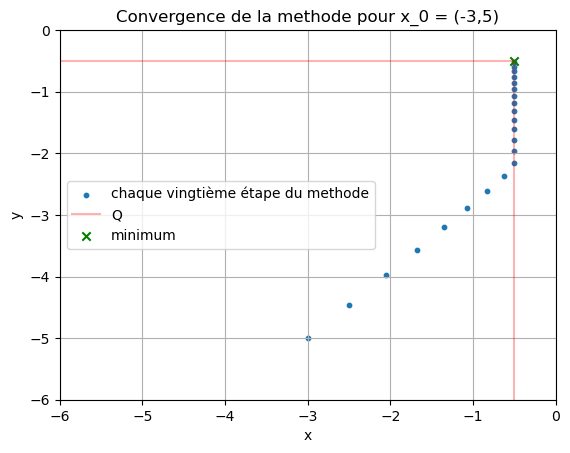

In [5]:
Q_arr_x = np.array([-1/2, -1/2, -10])
Q_arr_y = np.array([-10, -1/2, -1/2])

fig, ax = plt.subplots()

#tracer chaque vingtieme etape due methode
ax.scatter(etapes[::20,0],etapes[::20,1], s = 10, 
           label = 'chaque vingtième étape du methode'
          )
ax.plot(Q_arr_x, Q_arr_y, alpha = 0.3, color = 'r', label = 'Q')
#tracer le minimseur
ax.scatter(-1/2,-1/2, label = 'minimum', c = 'g', marker = 'x')
ax.set_ylim(-6,0)
ax.set_xlim(-6,0)
ax.set_title('Convergence de la methode pour x_0 = (-3,5)')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.grid()
ax.legend()

On regarde que les étapes de la méthode commencent en Q mais finalement, elles atteignent $\partial Q$, et le suivent directement vers le minimum en $(-\frac{1}{2}, -\frac {1}{2})$. 

On note en particulier, la caractéristque de la méthode que toutes les étapes sont dans Q.

### 2) Méthode de pénalisation

Pour la méthode de pénalisation, il faut trouver une fonction de pénalisation $\phi (x)$

si on considère les deux fonctions quadratiques
$$
a(x) = (x + \frac{1}{2})^2 \mathbb{1}\{x > -\frac{1}{2}\}
$$
$$
b(y) = (y + \frac{1}{2})^2 \mathbb{1}\{y > -\frac{1}{2}\}
$$

On note que les fonctions sont différetiables car leurs dérivées s'annullent en $-\frac{1}{2}$ pour la partie indicatrice et la partie quadratique.

en plus, si on pose

$$
\phi (x,y) = J(x,y) + \frac{1}{\epsilon} *(a(x) + b(y)) = J(x,y) + \frac{1}{\epsilon} *(\alpha (x,y))
$$

On a bien que $\phi (x)$ est une fonction de pénalisation comme  $\alpha(x,y) \ge 0$ et $\alpha(x,y) = 0$ si et seulement si $(x,y) \in Q$.

En plus, $\alpha$ est différentiable de gradient $\nabla \alpha (x,y) = \begin{pmatrix} a'(x) \\ b'(y) \end{pmatrix}   = \begin{pmatrix} (2x + 1) \mathbb{1}\{x > -\frac{1}{2}\} \\ (2y + 1) \mathbb{1}\{y > -\frac{1}{2}\}  \end{pmatrix} $ 

ainsi on obtient la gradient de la fonction de penalisation $\phi$:

$$
\nabla \phi(x,y) = \begin{pmatrix}  4x + 3y + \frac{1}{\epsilon} * (2x + 1) \mathbb{1}\{x > -\frac{1}{2}\} \\ 3x + 4y + \frac{1}{\epsilon} * (2y + 1) \mathbb{1}\{y > -\frac{1}{2}\} \end{pmatrix} 
$$

In [6]:
#definir la fonction phi
def phi(xy, eps):
    '''
    la fonction de penalisation phi
    :param: xy - tableau qui contient x et y
    :param: eps - constante de penalisation
    
    :returns: valeur de la fonction phi(xy)
    '''
    #stocker la valeur de J(x,y)
    total = J(xy)
    x = xy[0]
    y = xy[1]
    #on utilise 'if' pour la partie indicatrice
    if y > -1/2:
        #on ajoute la partie quadratique
        total +=  (y + 1/2)**2 / eps
    #la meme pour x
    if x > -1/2:
        total +=  (x + 1/2)**2 / eps
    return total

#definir la fonction gradient de phi
def gradPhi(xy, eps):
    '''
    le gradient de la fonction de penalisation phi
    :param: xy - tableau qui contient x et y
    :param: eps - constante de penalisation
    :returns: valeur du gradient de la fonction phi(xy)
    '''
    #stocker la valeur de gradJ(x,y) 
    #result est un array numpy de dim 2
    result = gradJ(xy)
    x = xy[0]
    y = xy[1]
    #on utilise 'if' pour la partie indicatrice
    if y > -1/2:
        #on ajoute la partie quadratique
        result[1] +=  (y + 1/2)**2/ eps
    #la meme pour x
    if x > -1/2:
        result[0] += (x + 1/2)**2 / eps
    return result

In [7]:
#Evaluation coordonnées pour J
#créer un "meshgrid" de valeurs de J
#stocker dans X,Y,Z
nx = 101
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,nx)
X, Y = np.meshgrid(x,y) 

'\n#Valeurs de J\nZJ = np.zeros((nx,nx))\nfor i in range(nx):\n    for j in range(nx):\n        ZJ[i,j] = phi(np.array([X[i,j],Y[i,j]]),0.5)\n'

In [8]:
#Evaluation coordonnées pour GradJ - champ vecteur

#on reduit la nombre d'evaluations pour
#le champ vecteur
nx2 = 10
x2 = np.linspace(-10,10,nx2)
y2 = np.linspace(-10,10,nx2)
X2, Y2 = np.meshgrid(x2,y2) 

U = np.zeros((nx2,nx2))
V = np.zeros((nx2,nx2))

'\n#valeurs de gradPhi\nfor i in range(nx2):\n    for j in range(nx2):\n        U[i,j], V[i,j] = gradPhi(np.array([X2[i,j],Y2[i,j]]),0.5)\n'

Text(0.5, 1.0, 'epsilon = 0.05')

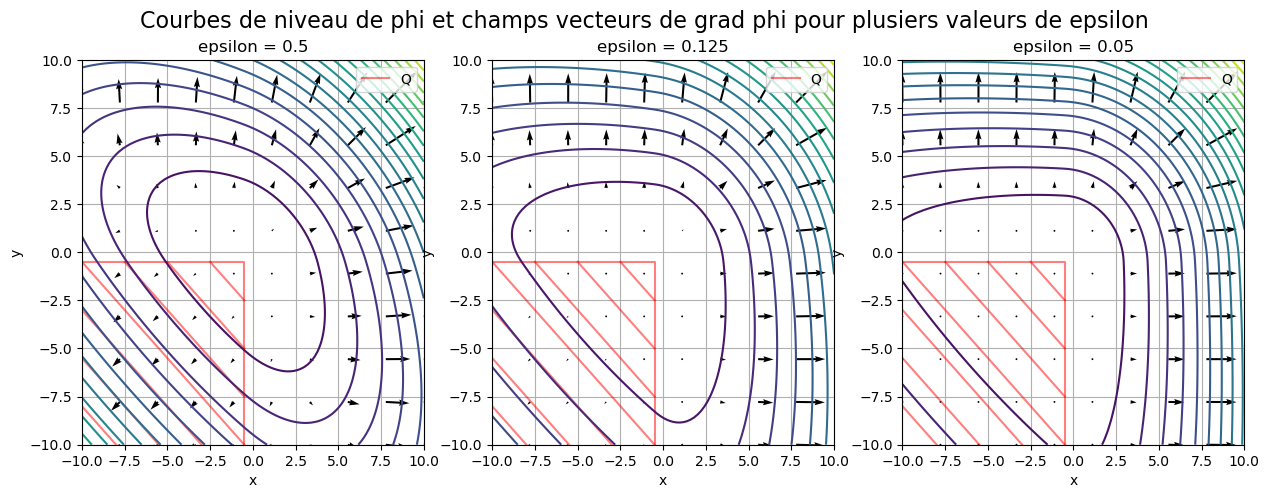

In [9]:
#on trace les courbes de niveau de phi 

eps_arr = [1/2,1/8,1/20]

fig, ax = plt.subplots(1,3,figsize = (15,5))

k = 0

for col in ax:
    col.set_ylim([-10,10])
    col.set_xlim([-10,10])
    col.set_xlabel('x')
    col.set_ylabel('y')
   
    #tracer la région de Q sur chaque graphique
    col.plot(Q_arr_x, Q_arr_y, alpha = 0.5, color = 'r', label = 'Q')
    col.plot(np.array([-2.5,-1/2]), np.array([-1/2,-2.5]), alpha = 0.5, color = 'r')
    col.plot(np.array([-5,-1/2]), np.array([-1/2,-5]), alpha = 0.5, color = 'r')
    col.plot(np.array([-7.5,-1/2]), np.array([-1/2,-7.5]), alpha = 0.5, color = 'r')
    col.plot(np.array([-10,-1/2]), np.array([-1/2,-10]), alpha = 0.5, color = 'r')
    col.plot(np.array([-12.5,-1/2]), np.array([-1/2,-12.5]), alpha = 0.5, color = 'r')
    col.plot(np.array([-15,-1/2]), np.array([-1/2,-15]), alpha = 0.5, color = 'r')
    col.plot(np.array([-17.5,-1/2]), np.array([-1/2,-17.5]), alpha = 0.5, color = 'r')
    
    #On calcule les valeurs des fonctions
    #Valeurs de J pour graphique 2
    ZJ = np.zeros((nx,nx))
    for i in range(nx):
        for j in range(nx):
            ZJ[i,j] = phi(np.array([X[i,j],Y[i,j]]),eps_arr[k])

    #valeurs de gradPhi pour graphique 2
    for i in range(nx2):
        for j in range(nx2):
            U[i,j], V[i,j] = gradPhi(np.array([X2[i,j],Y2[i,j]]),eps_arr[k])
            
    #1)courbes de niveau pour J
    col.contour(X, Y, ZJ, 20)
    #2)champ vecteur de gradJ
    col.quiver(X2, Y2, U, V)

    col.grid()
    col.legend()
    
    #eps_array indice
    k = k+1 

fig.suptitle('Courbes de niveau de phi et champs vecteurs de grad phi pour plusiers valeurs de epsilon', fontsize=16)
ax[0].set_title('epsilon = 0.5')
ax[1].set_title('epsilon = 0.125')
ax[2].set_title('epsilon = 0.05')

#

Par les graphiques, on peut voir clairment l'éffet de pénalisation dans la fonction et le gradient. Les regions dehors $Q$ connaissent une énorme augmentation de leurs valeurs obtenus.

### Pénalisation forte

Mainenant, On applique la methode du gradient à pas fixe pour tester la méthode de pénalisation. On commence en utilisant une pénalisation forte ($\epsilon = 10^{-4}$) et un point de départ $x_0 = (-0.3, 0,5)$

In [10]:
def methpc(J,gradJ,s,x0):
    
    eps = 1e-5
    #étape initiale
    #xk est choisi ici tels que
    #les criteres d'arrete ne sont pas
    #satisfait d'abord
    xk =  x0*10
    xkplus = x0
    xk_arr = [x0]
    k = 0
    #critere d'arrete
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps) and 
           ((np.linalg.norm(J(xkplus)-J(xk))/(1 + np.linalg.norm(J(xk)))) > eps)) and k<= 5000:
        xk = xkplus        
        dk = -gradJ(xk) #direction de descente
        #trouver xk+1
        xkplus = xk + s*dk
        #ajouter xk dans la liste
        xk_arr.append(xkplus)
        k = k+1
    return xkplus, np.array(xk_arr), len(xk_arr)-1

In [11]:
#definir x0 et eps
x0 = np.array([-0.3, 0.5])
eps = 1e-4

sol, etapes, no_etapes = methpc(lambda x: phi(x,eps), lambda x : gradPhi(x,eps), 1e-3,x0)

print('la nombre d\'itérations était', no_etapes)

la nombre d'itérations était 628


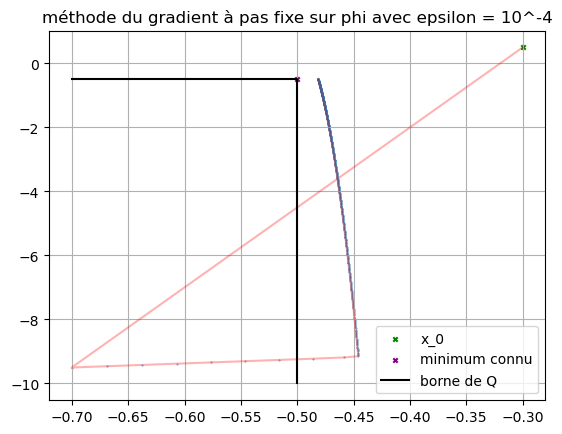

In [12]:


Q_arr_x = np.array([-1/2, -1/2, -0.7])
Q_arr_y = np.array([-10, -1/2, -1/2])

fig, ax = plt.subplots()


ax.plot(etapes[:,0],etapes[:,1], alpha = 0.3, color = 'r')
ax.scatter(etapes[:,0],etapes[:,1], s = 0.1)
ax.scatter([-0.3],[0.5], s = 10, label = 'x_0', color = 'green', marker = 'x')
ax.scatter([-0.5],[-0.5], s = 10, label = 'minimum connu', color = 'purple', marker = 'x')
ax.plot(Q_arr_x, Q_arr_y, alpha = 1, color = 'black', label = 'borne de Q')
ax.set_title('méthode du gradient à pas fixe sur phi avec epsilon = 10^-4')
ax.grid()
ax.legend()

les premiers étapes vont beaucoup plus loin que les suivants. ceci est causé par des gradients abrupts en dehors de Q. La methode converge dans 628 étapes pres du minimum connu $(-0.5,-0.5)$.

la méthode s'arrête assez tôt à cause de la stagnation du gradient (condition d'arrêt 2). on pourrait varier cela pour potentiellement trouver un meilleur résultat pour ce problème.


### Pénalisation faible

on va réessayer avec la methode du gradient à pas fixe  pour une pénalisation plus faible. On utilise une pénalisation de $\epsilon = 0.5$ et la meme point de départ $x_0 = (-0.3, 0,5)$

In [13]:
#definir x0 et eps
x0 = np.array([-0.3, 0.5])
eps = 0.5

sol, etapes, no_etapes = methpc(lambda x: phi(x,eps), lambda x : gradPhi(x,eps), 1e-3,x0)

print('la nombre d\'itérations était', no_etapes,' avec solution ', sol)

la nombre d'itérations était 918  avec solution  [-0.08652609 -0.0269404 ]


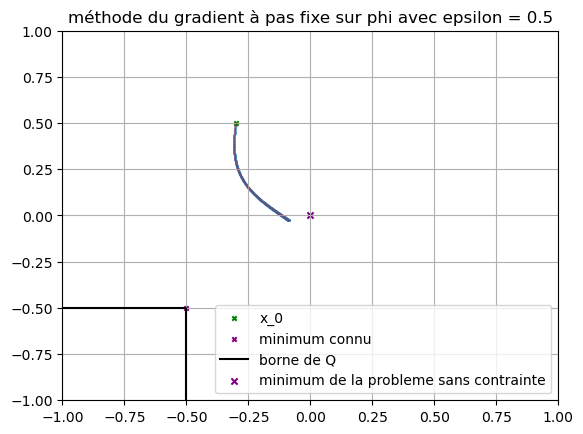

In [14]:
#on trace les graphiques
Q_arr_x = np.array([-1/2, -1/2, -1])
Q_arr_y = np.array([-1, -1/2, -1/2])

fig, ax = plt.subplots()


ax.plot(etapes[:,0],etapes[:,1], alpha = 0.3, color = 'r')
ax.scatter(etapes[:,0],etapes[:,1], s = 0.1)
ax.scatter([-0.3],[0.5], s = 10, label = 'x_0', color = 'green', marker = 'x')
ax.scatter([-0.5],[-0.5], s = 10, label = 'minimum connu', color = 'purple', marker = 'x')
ax.plot(Q_arr_x, Q_arr_y, alpha = 1, color = 'black', label = 'borne de Q')
ax.set_title('méthode du gradient à pas fixe sur phi avec epsilon = 0.5')
ax.scatter([0],[0], s = 20, label = 'minimum de la problème sans contrainte', color = 'purple', marker = 'x')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.grid()
ax.legend()

La méthode de pénalisation faible a convergé, mais elle n'a pas trouver la solution souhaitée, en fait, il approche le minimum de la problème sans contrainte $(0,0)$. cela implique que la pénalisation n'a pas assez d'effet sur la fonction J, il faut trouver un pénalisation plus forte. Pour trouver la comportement idéal, on pourrait trouver un epsilon entre les deux valuers qui était utilisée



## Exercise 2

cette exercise est un problème de minimisation avec contraintes. La premire partèie est avec les contreintes d'égalité, et le deuxième introduit des contraintes d'inégalité. On utilise la configuration de la feuille.


$$
K = \{x \in \mathbb{R}^n : \langle\,x,u\rangle = 1, \langle\,x,e\rangle, = r_0 \}
$$

par linéarité:

$$
K = \{x \in \mathbb{R}^n : u^Tx = 1 ,e^Tx = r_0 \} <=> K = \{x \in \mathbb{R}^n : Cx = f \}
$$

où 
$$
C = 
\begin{pmatrix}
    u^T \\
    e^T 
\end{pmatrix}
$$
et 
$$
f = 
\begin{pmatrix}
    1 \\
    r_0 
\end{pmatrix}
$$

ainsi, on reformule la problème comme une problème de minimisation en $J$ avec contreintes d'égalités linéaires définie par $Cx = f$.


ci-dessous est une méthode pour créer une matrice de covariance A

In [15]:
n = 4

r_0 = 2.5
e = np.zeros(n)

for i in range(1,n+1):
    e[i-1] = i

A = np.diag(e)
R = np.random.rand(n,n)
A = A + 0.05 * (np.transpose(R) @ R)

Dans la dernière ligne du programme, on ajoute une matrice definie positive $R^TR$ (qui est relativement petite) à la matrice définie par $diag(e_i)$. Cette somme simule la matrice covariance des actions $R_i$ qu'on souhaite modéliser. la matrice $R^TR$ est définie positive comme $M^TM$ est définie positive pour toute matrice $M$ dans $\mathbb{M}(n,n)$. Ceci est important car la covariance de deux matrices est nécessairement positive.

Ici, les petits covariances entre les actions $R_i$ représentent les dépendances entre les différents actions. qui existera en pratique.

In [16]:
def J(x):
    '''
    cette fonction modèle la 
    fonction mathématique J
    qu'on souhaite minimiser
    
    :Param: x; vecteur réel de longeur n
    :return: J(x), resultat de la fonction
    '''
    return np.dot(x, A @ x) / 2

def gradJ(x):
    return(np.transpose(A) + A)@x/2


On considere la lagrangien $L$ défini par:

$$
L(x,\mu) = J(x) + \mu ^T(Cx - f)
$$

L'algorithme essaie d'optimiser $L$ dans $x$ et $\mu$ en même temps. Pour mu, on cherche une valeur de $x$ qui respecte les contraintes et à chaque pas, on minimise $x$ pour ce choix de $\mu$ avec une méthode optimale de gradient de pas constante sur les fonctions $L$ est $\nabla_x L$.

Donc, en plus on a:
$$
\nabla_x L(x,\mu) = \nabla_x J(x) + \nabla_x \mu ^T(Cx - f ) = \nabla J(x) + \mu ^TC
$$




In [17]:
def L(x,mu,A,r0):
    '''
    fonction de la lagrangien
    :param: x; dim n
    :param: mu; dim 2
    '''
    #definir e, u et C par A
    e = np.diag(A)
    u = np.ones(len(e))
    #C = np.transpose(np.array([e,u]))
    C = np.array([e,u])
    f = np.array([r0,1])
    #print('C is ', C, "\n x ", x)
    return J(x) + np.transpose(mu) @ (C @ x - f)

def gradxL(x,mu,A):
    '''
    gradient de la lagrangien
    par rapport a x
    '''
    e = np.diag(A)
    u = np.ones(len(e))
    C = np.array([e,u])
    return gradJ(x) + np.transpose(mu) @ C
    

In [18]:
#algorithme d'uzawa:

def uwaza(L,gradxL,s,x0,mu0,A,r0):
    '''
    methode d'uwaza pour notre problème
    
    :param: L; fonction (Lagrangien)
    :param: gradxL; fonction (grad de Lagrangien p.r. a x)
    :param: s; float, longeur de pas pour optimisation de mu
    :param: x0; np.array, valuer intiale de x
    :param: mu0; np.array, valeur initiale de mu
    :param: A; 
    '''
    
    #definition des contraintes
    #definir e, u et C par A
    e = np.diag(A)
    u = np.ones(len(e))
    C = np.array([e,u])
    #definir f
    f = np.array([r0,1])

    
    #tolerance
    eps = 1e-5
    #étape initiale
    xk =  x0
    xkplus = x0
    xk_arr = [x0]
    muk = mu0
    mukplus = mu0
    #k: compteur des itérations
    k = 0
    #critere d'arrete sur la contrainte norme
    while np.linalg.norm((C@xk-f)) >= eps and k<= 5000:
        #mise a jour xk et muk
        xk = xkplus               
        muk = mukplus 
        
        #mise a jour mu_k_1
        mukplus[0] = (muk + s * (C @ xk - f))[0]
        #mise a jour mu_k_2
        mukplus[1] = (muk + s * (C @ xk - f))[1]        
        
        #trouver xk+1 par un methode de gradient sur la
        #lagrangian avec mukplus
        xkplus, dum1, dum2 = methpc(lambda x: L(x,mukplus,A,r0), 
                        lambda x: gradxL(x,mukplus,A),
                        s = 1e-3, x0 = xk)
        
        #ajouter xk dans la liste
        xk_arr.append(xkplus)
        k = k+1
    return xkplus, np.array(xk_arr), len(xk_arr)-1


In [22]:
def mat_A(n):
    e = np.zeros(n)
    for i in range(1,n+1):
        e[i-1] = i

    A = np.diag(e)
    R = np.random.rand(n,n)
    A = A + 0.05 * (np.transpose(R) @ R)
    return A



Maintenant, on teste l'algorithme sur 3 problèmes définis par 3 matrices différentes $A$

In [23]:
r0 = 2.5
s= 1e-2
    
for n in [4,8,12]:
    #créer la matrice A
    A = mat_A(n)
    #initialiser mu et x
    mu0 = np.ones(2)
    x0= np.ones(n)
    sol, étapes, no_étapes = uwaza(L,gradxL,s,x0,mu0,A,r0)
    print('pour A = ', A, ' x* = ', sol, 'nombre d\'étapes = ', no_étapes)

pour A =  [[1.13146191 0.08955243 0.0569452  0.05387008]
 [0.08955243 2.07020591 0.04685176 0.04849399]
 [0.0569452  0.04685176 3.05270537 0.02426552]
 [0.05387008 0.04849399 0.02426552 4.0415    ]]  x* =  [0.28171906 0.24828578 0.2395046  0.23152952] nombre d'étapes =  5001
pour A =  [[1.12049725 0.14448325 0.06744085 0.11615321 0.07681329 0.12412895
  0.05506976 0.08074442]
 [0.14448325 2.19715252 0.09429416 0.15018328 0.117924   0.15521033
  0.08814673 0.0970116 ]
 [0.06744085 0.09429416 3.04799782 0.07261113 0.06018114 0.07331566
  0.04099918 0.04599823]
 [0.11615321 0.15018328 0.07261113 4.14075115 0.10346454 0.11925538
  0.08681306 0.07957375]
 [0.07681329 0.117924   0.06018114 0.10346454 5.11256547 0.08549451
  0.08955713 0.04481189]
 [0.12412895 0.15521033 0.07331566 0.11925538 0.08549451 6.15145383
  0.06373837 0.09345758]
 [0.05506976 0.08814673 0.04099918 0.08681306 0.08955713 0.06373837
  7.10072565 0.04082054]
 [0.08074442 0.0970116  0.04599823 0.07957375 0.04481189 0.0934

La inconvenience majeur dans cette formulation est que la solution peut trouver des valeurs négatives dans la solution de x. Dans le contexte de notre problème, c'est absurde 
Pour remédier à cela, nous devrions ajouter une contrainte d'inégalité au problème comme suit.

$$
K =K = \{x \in \mathbb{R}^n : Cx = f, -x_i \le 0, \forall i \in \{1,\dots, n\} \} = \{x \in \mathbb{R}^n : Cx = f, Hx \le l\}
$$

où 
$$
H = -Id_n
$$
et 
$$
l = (0)_n
$$

ainsi, on reformule la problème comme une problème de minimisation en $J$ avec contraintes d'égalité et contraintes d'inégalité.

On fait en code.

Il faut redéfinir la Lagrangien avec un terme en lambda

$$
L(x,\mu) = J(x) + \mu ^T(Cx - f) + \lambda^T(Ax)
$$

On note que $\lambda >= 0$ est une condition nécessaire pour conserver l'inégalité


d'une manière similaire qu'avant
$$
\nabla_x L(x,\mu) = \nabla_x J(x) + \nabla_x \mu ^T(Cx - f ) \nabla_x (\lambda^T(Ax)) = \nabla J(x) + \mu ^TC + \lambda^TA
$$


In [50]:
def L2(x,mu,lmbd,A,r0):
    '''
    fonction de la lagrangien adaptée
    :param: x; dim n
    :param: mu; dim 2
    '''
    #definir e, u et C par A
    e = np.diag(A)
    u = np.ones(len(e))
    #C = np.transpose(np.array([e,u]))
    C = np.array([e,u])
    f = np.array([r0,1])
    #definir H
    H = -np.eye(len(e))

    return J(x) + np.transpose(mu) @ (C @ x - f) + np.transpose(lmbd) @ (H @ x)

def gradxL2(x,mu,lmbd,A):
    '''
    gradient de la lagrangien
    par rapport a x
    '''
    e = np.diag(A)
    u = np.ones(len(e))
    C = np.array([e,u])
    #definir H
    H = -np.eye(len(e))
    return gradJ(x) + np.transpose(mu) @ C + np.transpose(lmbd) @ H

In [56]:
#algorithme d'uzawa adaptée pour x >= 0:

def uwaza2(L2,gradxL2,s,x0,mu0,lmbd0,A,r0):
    '''
    methode d'uwaza pour notre problème
    
    :param: L; fonction (Lagrangien)
    :param: gradxL; fonction (grad de Lagrangien p.r. a x)
    :param: s; float, longeur de pas pour optimisation de mu
    :param: x0; np.array(2), valuer intiale de x
    :param: mu0; np.array(2), valeur initiale de mu
    :param: lmbd0; np.array(n), valeur initiale de lambda
    :param: A; np.array(n,n)
    '''
    
    #definition des contraintes
    #definir e, u et C par A
    e = np.diag(A)
    u = np.ones(len(e))
    C = np.array([e,u])
    #definir f
    f = np.array([r0,1])
    #definir H
    H = -np.eye(len(e))

    
    #tolerance
    eps = 1e-5
    #étape initiale
    xk =  x0
    xkplus = x0
    xk_arr = [x0]
    muk = mu0
    mukplus = mu0
    lmbdk = lmbd0
    lmbdkplus = lmbd0
    #k: compteur des itérations
    k = 0
    #critere d'arrete sur la contrainte norme
    while np.linalg.norm((C@xk-f)) >= eps and  k<= 5000:
        #mise a jour xk et muk
        xk = xkplus               
        muk = mukplus 
        
        #mise a jour mu_k_1
        mukplus[0] = (muk + s * (C @ xk - f))[0]
        #mise a jour mu_k_2
        mukplus[1] = (muk + s * (C @ xk - f))[1]  
        
        
        #mise a jour lambda_k
        for j in range(0,len(e)):
            lmbdkplus[j] = np.max(lmbdk + s * H,0)[j]
        
        #trouver xk+1 par un methode de gradient sur la
        #lagrangian avec mukplus
        xkplus, dum1, dum2 = methpc(lambda x: L2(x,mukplus,lmbdkplus,A,r0), 
                        lambda x: gradxL2(x,mukplus,lmbdkplus,A),
                        s = 1e-3, x0 = xk)
        
        #ajouter xk dans la liste
        xk_arr.append(xkplus)
        k = k+1
    return xkplus, np.array(xk_arr), len(xk_arr)-1

In [57]:
mu0 = np.array([5.0,2.0])
r0 = 2.5
s= 1e-2
x0= np.ones(4)
lmbd0 = np.ones(4)
A = mat_A(4)



sol, étapes, no_étapes = uwaza2(L2,gradxL2,s,x0,mu0,lmbd0,A,r0)
sol, no_étapes

(array([0.26912251, 0.24837098, 0.24387376, 0.23752422]), 5001)

Nous étudions à nouveau plusieurs instances de la matrice $A$

In [58]:
r0 = 2.5
s= 1e-2
#algorithm pour A.shape = 
#(4,4), (8,8), (12,12)
for n in [4,8,12]:
    #créer la matrice A
    A = mat_A(n)
    #initialiser mu et x
    mu0 = np.ones(2)
    x0= np.ones(n)
    lmbd0 = np.ones(n)
    sol, étapes, no_étapes = uwaza2(L2,gradxL2,s,x0,mu0,lmbd0,A,r0)
    print('pour A = ', A, ' x* = ', sol, 'nombre d\'étapes = ', no_étapes)

pour A =  [[1.05218922 0.02912615 0.02871416 0.05344179]
 [0.02912615 2.01802273 0.02008035 0.03400389]
 [0.02871416 0.02008035 3.04860686 0.04484925]
 [0.05344179 0.03400389 0.04484925 4.06618034]]  x* =  [0.26486641 0.25203869 0.24417258 0.23820925] nombre d'étapes =  5001
pour A =  [[1.13485838 0.06146117 0.09713937 0.07864483 0.13399997 0.09968707
  0.09058398 0.06887788]
 [0.06146117 2.04300535 0.06327606 0.042547   0.05444486 0.04685512
  0.04437907 0.03418778]
 [0.09713937 0.06327606 3.11218574 0.07318504 0.0802399  0.09196009
  0.0774572  0.05022557]
 [0.07864483 0.042547   0.07318504 4.07300969 0.08343059 0.06430196
  0.06123536 0.03449746]
 [0.13399997 0.05444486 0.0802399  0.08343059 5.16329254 0.1096626
  0.10191442 0.06191163]
 [0.09968707 0.04685512 0.09196009 0.06430196 0.1096626  6.13879401
  0.10447867 0.05557842]
 [0.09058398 0.04437907 0.0774572  0.06123536 0.10191442 0.10447867
  7.10413196 0.045632  ]
 [0.06887788 0.03418778 0.05022557 0.03449746 0.06191163 0.05557

Enfin, on truove le comportement souhaité. Il y a des solutions qui sont négatives mais elles sont très proches de zéro $\|x_i\| \approx 10^-2$

on constate que les solutions pour les matrices A de plus petite dimension sont beaucoup plus uniformes (et moins intéressantes). Cela peut être dû à une plus grande covariance entre différentes actions $R_i$.

La méthode d'Uzawa, comme la méthode de pénalisation, ne trouve pas nécessairement une solution finale qui satisfasse les contraintes du problème. Au contraire, ils s'approchent tous les deux de la solution idéale dans l'espace contraint. Dans ce problème, la méthode d'Uzawa s'approche de l'extérieur de l'espace de contraintes, et à cause de nos critères d'arrêt, notre solution finale n'est techniquement pas une solution valide. si nous voulions faire une approximation convenable dans la pratique, nous pourrions utiliser une projection orthogonale sur l'espace contraint.